In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

In [2]:
pos_flat = np.loadtxt('ex18_data.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)

In [3]:
class DistanceMoments:
    def __init__(self, color='C4', eps0=5, sigma=2**(-1/6), x_range=[-4,4], y_range=[-4,4]):
        self.xwidth = 1
        self.color = color
        self.eps0 = eps0
        self.sigma = sigma
        self.x_range = x_range
        self.y_range = y_range
        self.bin_centers = range(2)
    
    def descriptor(self, pos):
        all_distances = pdist(pos)
        mean = np.mean(all_distances)
        std = np.std(all_distances)
        return np.array([mean, std])
    
    def potential(self, r):
        return 4*self.eps0*((self.sigma/r)**12 - (self.sigma/r)**6)
    
    def total_energy(self, pos):
        all_distances = pdist(pos)
        return np.sum(self.potential(all_distances))
    
    def plot_mean_std(self, pos, ax):
        ax.set(ylim=[0, 2.3], xticks=range(2), xticklabels=[r'$\mu$', r'$\sigma$'], title=self.__class__.__name__, aspect='equal')
        vector = self.descriptor(pos)
        ax.bar(self.bin_centers, vector, width=0.8 * self.xwidth, color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_ylim([0, 2.3])
    
    def plot_2Dcluster(self, pos, ax):
        ax.set(xlabel=r'$x$', ylabel=r'$y$', xlim=self.x_range, ylim=self.y_range, aspect='equal')
        ax.grid(alpha=0.5)
        ax.scatter(pos[:,0], pos[:,1], edgecolors='k')
        ax.set_title(fr'$E = {self.total_energy(pos):.3f}$')

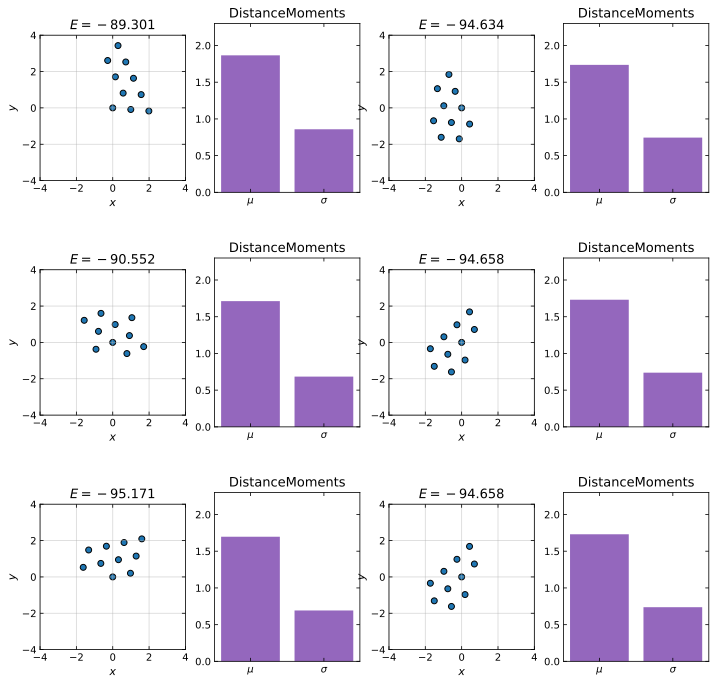

In [4]:
fig, axs = plt.subplots(3, 4, figsize=(12, 12))
dm = DistanceMoments()
for ax1, ax2 in zip(axs.flatten()[::2], axs.flatten()[1::2]):
    i = np.random.randint(len(positions))
    dm.plot_2Dcluster(positions[i], ax1)
    dm.plot_mean_std(positions[i], ax2)

fig.savefig('ex18_fig1.png')

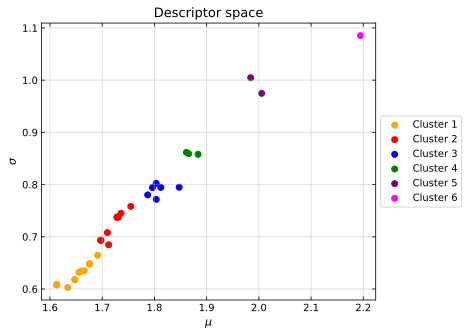

In [5]:
descriptors = np.array([dm.descriptor(pos) for pos in positions])
intervals_colors = {
    'orange': [1.6, 1.695],
    'red': [1.695, 1.77],
    'blue': [1.77, 1.85],
    'green': [1.85, 1.984],
    'purple': [1.984, 2.08],
    'magenta': [2.08, 2.2]
}

fig, ax = plt.subplots(figsize=(6, 6))
ax.set(xlabel=r'$\mu$', ylabel=r'$\sigma$', aspect='equal', title='Descriptor space')
ax.grid(alpha=0.5)
masks = []
for i, color, interval in zip(range(6), intervals_colors.keys(), intervals_colors.values()):
    mask = (descriptors[:,0] > interval[0]) & (descriptors[:,0] < interval[1])
    masks.append(mask)
    ax.scatter(descriptors[mask,0], descriptors[mask,1], color=color, label=f'Cluster {i+1}')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.savefig('ex18_fig2.png')

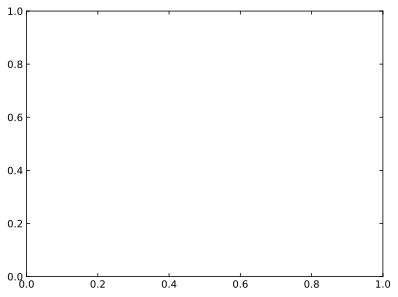

In [6]:
grouped_positions = [positions[mask] for mask in masks]
fig, ax = plt.subplots()